# GeoChem Exploration Data Analysis 

In [334]:
# Python modules
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# normality Test
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, pearsonr

from IPython.display import display
from ipywidgets import Checkbox, Dropdown, FloatRangeSlider, SelectMultiple
import pandas as pd

from termcolor import colored, cprint

# IPython Widgets
from ipyfilechooser import FileChooser

In [335]:
# Global variables
sns.set_theme()

## CSV Format

Delimiter must be ',', quote character must be "" and first column must containt field names

In [336]:
fc = FileChooser('.')
fc.title ='<b>Select csv geoChem table</b>'
fc.filter_pattern='*.csv'
fc.reset(path='.', filename= "RNGGeochem.csv")

display(fc)



FileChooser(path='D:\Users\gasato\anacondaProjects\GeoChem', filename='RNGGeochem.csv', title='<b>Select csv g…

In [337]:
print('Selected dataset to be procesed: ' + fc.selected_filename)

Selected dataset to be procesed: RNGGeochem.csv


In [338]:
# Reading csv with Pandas and create a dataframe

df = pd.read_csv(fc.selected_filename)

# dataframe style

df = df.drop(['OBJECTID'], axis=1)
 
itemSel = SelectMultiple(
    options=df.columns.values,
    #value=['Oranges'],
    #rows=10,
    description='Drop Items',
    disabled=False
)

display( itemSel)


SelectMultiple(description='Drop Items', options=('NUMERO_MUE', 'TIPO_MUEST', 'SYMBOL', 'Ag_ppm', 'Al_porcien'…

In [339]:
dfD = df.drop(list(itemSel.value), axis=1)

display(dfD)

,Ag_ppm,Al_porcien,As_ppm,Au_ppb,Ba_ppm,Be_ppm,Bi_ppm,Br_ppm,Ca_porcien,Cd_ppm,...,U_ppm,V_ppm,W_ppm,Y_ppm,Yb_ppm,Zn_ppm,Zr_ppm,FRACCION,Na_porcien,Sr_ppm
0,-0.2,9.07,4.2,13.0,572.0,-1.0,12.0,10.2,4.65,0.7,...,3.4,240.0,2.0,18.0,1.2,105.0,0.0,85053,1.866,346.0
1,-0.2,8.83,4.1,22.0,343.0,-1.0,-5.0,10.8,4.86,1.5,...,1.6,223.0,2.0,18.1,1.7,100.0,0.0,85053,2.767,371.0
2,-0.2,9.11,3.4,11.0,398.0,-1.0,9.0,5.7,4.89,0.8,...,-0.5,209.0,2.0,17.2,1.2,92.8,0.0,85053,1.952,379.0
3,-0.2,9.34,3.2,5.0,535.0,-1.0,55.0,6.5,5.01,0.5,...,1.1,203.0,4.0,16.7,1.9,94.9,0.0,85053,2.203,389.0
4,-0.2,8.75,4.5,10.0,660.0,-1.0,-5.0,6.6,4.63,1.6,...,1.6,189.0,2.0,15.9,1.1,82.8,0.0,85053,1.797,383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,-0.2,7.10,8.7,2.0,366.0,-1.0,-5.0,2.5,2.59,-0.5,...,1.8,105.0,2.0,16.5,1.4,86.8,0.0,85051,1.674,252.0
3151,-0.2,7.92,3.2,12.0,556.0,-1.0,9.0,4.3,4.12,0.9,...,1.0,234.0,2.0,16.1,2.0,122.0,0.0,85053,2.724,283.0
3152,-0.2,7.69,8.4,11.0,327.0,-1.0,-5.0,7.9,3.15,1.3,...,3.4,285.0,11.0,20.1,2.4,114.0,0.0,85053,1.994,271.0
3153,-0.2,8.94,6.2,15.0,315.0,-1.0,6.0,7.2,4.59,0.7,...,5.6,175.0,33.0,18.1,2.2,81.8,0.0,85053,2.229,347.0


In [341]:
# Menu for selecting item column and log or not log

fieldNameMenu = Dropdown(options=dfD.columns.values, description='Column:')

box = Checkbox(False, description='Log10 (y/n)')

display(fieldNameMenu, box)


Dropdown(description='Column:', options=('Ag_ppm', 'Al_porcien', 'As_ppm', 'Au_ppb', 'Ba_ppm', 'Be_ppm', 'Bi_p…

Checkbox(value=False, description='Log10 (y/n)')

In [342]:
# Read selected column

dataSerie = df.loc[:,fieldNameMenu.value].loc[lambda x : x > 0]

In [343]:
      
dataLog10 = np.log10(dataSerie)

In [344]:
f = FloatRangeSlider(
    value=[dataLog10.min(), dataLog10.max()],
    min=dataLog10.min(),
    max=dataLog10.max(),
    step=0.01,
    description='Log10:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
print("Select min and max values threshold")
display(f)

Select min and max values threshold


FloatRangeSlider(value=(-0.6989700043360187, 0.3424226808222063), continuous_update=False, description='Log10:…

In [345]:
print("Selected min & max values: %s %s" % f.value)

Selected min & max values: -0.6989700043360187 0.3424226808222063


In [346]:
#Filtering 

dataLog10F = dataLog10.loc[ lambda x: (dataLog10 >= f.value[0]) & (dataLog10 <= f.value[1])]

In [364]:
statsDict={'Data population': [dataSerie.size, dataLog10F.size],
          'Min Value':[dataSerie.min(), dataLog10F.min()],
          'Max Value':[dataSerie.max(), dataLog10F.max()],
          'Mean Value':[dataSerie.mean(), dataLog10F.mean()],
          'Standard Desviation':[dataSerie.std(), dataLog10F.std()],
          'Percentil 10%':[np.quantile(dataSerie, .10), np.quantile(dataLog10F, .10)],
          'Percentil 50%':[np.quantile(dataSerie, .50), np.quantile(dataLog10F, .50)],
          'Percentil 90%':[np.quantile(dataSerie, .90), np.quantile(dataLog10F, .90)]
}

StatsIndexLabels = ['Item ' + fieldNameMenu.value + ' stats', 'Log10 stats']
dfStats          = pd.DataFrame(statsDict, index=StatsIndexLabels)
dfStats          = dfStats.style.set_caption(fieldNameMenu.value + ' Values Statistics')

#print('Stats for Item' + fieldNameMenu.value )

display(dfStats)




Stats for ItemAg_ppm


,Data population,Min Value,Max Value,Mean Value,Standard Desviation,Percentil 10%,Percentil 50%,Percentil 90%
Item Ag_ppm stats,257,0.20000,2.200000,0.449805,0.270867,0.20000,0.40000,0.700000
Log10 stats,257,-0.69897,0.342423,-0.401640,0.207791,-0.69897,-0.39794,-0.154902


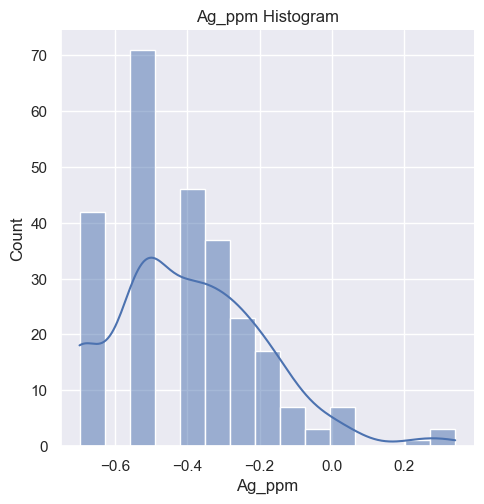

In [357]:

sns.displot(data=dataLog10F, kde=True).set(title="Histogram");



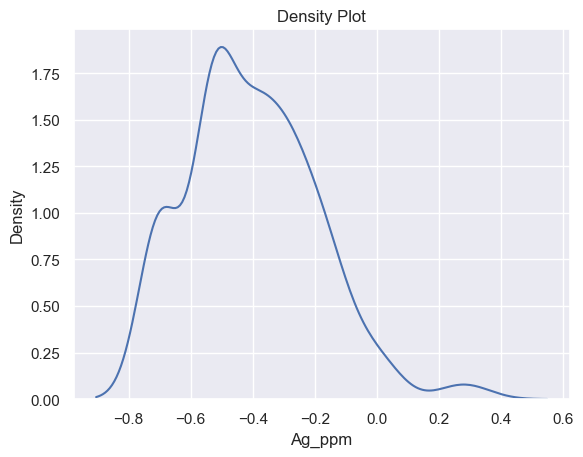

In [359]:
#Density plot

sns.kdeplot(dataLog10F).set(title='Density Plot');


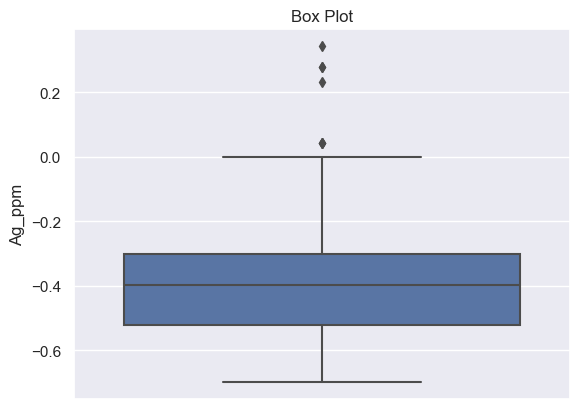

In [360]:
sns.boxplot(y=dataLog10F).set(title='Box Plot');

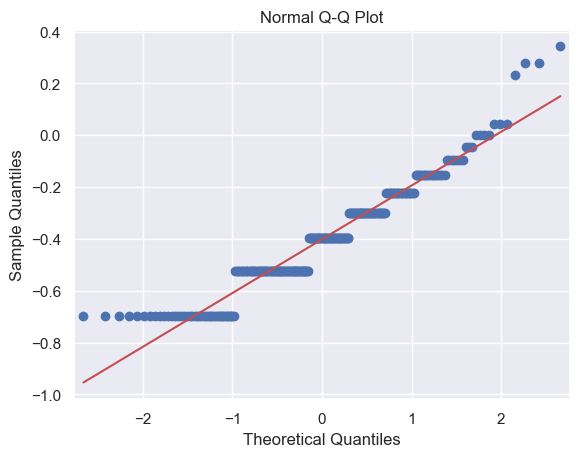

In [361]:
qqplot(dataLog10F, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

In [353]:
# normality test


'''
Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing 
it to critical values from the distribution of the test statistic.
p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

'''

stat, p = shapiro(dataLog10F)

print('Stats=%.3f, p=%.3f' % (stat, p))

# interpret

alpha = 0.05

if p > alpha:
    cprint('According to  Shapiro-Wilks the sample has a Gauss distribution (The Null hypotesis is not reyected)','red',  attrs=['bold'])
else:
    cprint('According to  Shapiro-Wilks the sample has NOT a Gauss distribution (The Null hypotesis is rejected)','red',  attrs=['bold'])





Stats=0.934, p=0.000
According to  Shapiro-Wilks the sample has NOT a Gauss distribution (The Null hypotesis is rejected)
